<a href="https://colab.research.google.com/github/laperez/Phyton/blob/master/Sesion_03_Iniciacion_a_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Enlace](https://drive.google.com/uc?export=view&id=1N_Cf8b0OVNbFMd5lmNvlhY98X6liuTZh)

**Contenido:**


1. Introducción
2. Importación
3. Lectura de datos
4. Acceso a datos
5. Manipulación
6. Ejercicios



# **Introducción a Pandas**

Pandas es una librería de Python diseñada para el análisis de conjuntos de datos en formato de tablas. El objeto fundamental de Pandas es el DataFrame (df) que contiene al conjunto de datos y permite diversas manipulaciones. Un DataFrame está formado por una o varias Series que representan las columnas.

La web principal de la librería es:
https://pandas.pydata.org/

La dirección para consulta de la API está en:
https://pandas.pydata.org/docs/reference/index.html

Una cheat sheet (versión resumida para consulta de funcionalidades aparece en):
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Libro del autor online (2020, ojo, tiene 3000 páginas):
https://pandas.pydata.org/docs/pandas.pdf

Libro del autor (online en la UJA, permalink de la biblioteca):
https://buscaenbuja.ujaen.es/permalink/34CBUA_UJA/cqp924/alma991003848455704994

Otro libro de interés es el que trata sobre Pandas+Numpy+Matplotlib:
https://buscaenbuja.ujaen.es/permalink/34CBUA_UJA/df6b9e/alma991004028898804994

# Importación de librerías

## Importación de pandas

In [1]:
#
# Como cualquier librería de python, pandas debe importarse antes de usuarlo.
# De forma general siempre se utiliza un álias para simplificar el acceso
#
# Python Abstraction Data Analysis
import pandas as pd

## Importación de los accesos a Google Drive para lectura/grabación

In [ ]:
# Conexión de archivos con Google drive
from google.colab import drive
# Montaje de la unidad (el directorio indica el punto de montaje y siempre será '/content/...')
drive.mount('/content/drive', force_remount=True)
# Además vamos a poner el directorio por defecto para el resto del notebook
dirDef = '/content/drive/My Drive/CursoPythonCEATIC/Curso2020/20200707_0900_Introduccion_a_Pandas/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Lectura de datos con Pandas

## Introducción

Uno de los aspectos de más relevancia en Pandas es la facilidad de lectura/grabación de formatos "nativos", de esta manera simplificamos el trabajo de programación dejando a la librería que se encargue de los aspectos más "específicos" y centrándonos en la resolucion del análisis que tenemos delante y olvidánnos también en la grabación/exportación de la información por la misma causa.

La lista de formatos accesibles es extensa y puede consultarse en (https://pandas.pydata.org/docs/user_guide/io.html). Sin embargo, destacaremos aquí los más interesantes:
1. CSV (*read_csv* / *to_csv*) & text files (*read_fwf*)
2. JSON (*read_json* / *to_json*)
3. Excel files (*read_excel* / *to_excel*) & OpenDocument Spreadsheets (*read_excel*)
4. Pickling (*read_pickle* / *to_pickle*)
5. Formatos específicos de programas estadísticos como SAS (*read_sas*) y SPSS (*read_spss*).



## Lectura de información

Vamos a cargar algunos datos en abierto. Siguiendo el tema más actual, vamos a acceder a la información en el portal de datos abiertos de la Unión Europea (https://data.europa.eu/euodp/es/home) y vamos a descargar la información del COVID-19 (https://data.europa.eu/euodp/es/data/dataset/covid-19-coronavirus-dataen) que aparece en un gran número de formatos y visualizaciones. De entre todas ellas nos seleccionaremos el formato JSON y el CSV.

Aunque inicialmente sea necesario sólo cargarlo una vez (y los archivos pueden accederse a traves de su URI), se recomienda descargar ambos archivos al Google Drive para que no sea necesario recargarlo cada vez que se hagan pruebas o se necesite reinicar la información.

In [ ]:
#datosWeb = pd.read_json('https://opendata.ecdc.europa.eu/covid19/casedistribution/json/')
datosJSON = pd.read_json(dirDef + 'COVID-19_opendata_ecdc_europa_20200704.json', orient='records')
datosCSV = pd.read_csv(dirDef + 'COVID-19_opendata_ecdc_europa_20200704.csv')

In [ ]:
# Mostramos la carga del JSON
datosJSON

,records
0,"{'dateRep': '04/07/2020', 'day': '04', 'month'..."
1,"{'dateRep': '03/07/2020', 'day': '03', 'month'..."
2,"{'dateRep': '02/07/2020', 'day': '02', 'month'..."
3,"{'dateRep': '01/07/2020', 'day': '01', 'month'..."
4,"{'dateRep': '30/06/2020', 'day': '30', 'month'..."
...,...
27617,"{'dateRep': '25/03/2020', 'day': '25', 'month'..."
27618,"{'dateRep': '24/03/2020', 'day': '24', 'month'..."
27619,"{'dateRep': '23/03/2020', 'day': '23', 'month'..."
27620,"{'dateRep': '22/03/2020', 'day': '22', 'month'..."


In [ ]:
# Mostramos la carga del CSV
datosCSV

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,04/07/2020,4,7,2020,302,12,Afghanistan,AF,AFG,38041757.0,Asia
1,03/07/2020,3,7,2020,186,33,Afghanistan,AF,AFG,38041757.0,Asia
2,02/07/2020,2,7,2020,319,28,Afghanistan,AF,AFG,38041757.0,Asia
3,01/07/2020,1,7,2020,279,13,Afghanistan,AF,AFG,38041757.0,Asia
4,30/06/2020,30,6,2020,271,12,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
27617,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27618,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
27619,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27620,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


In [ ]:
# Para convertir los registros JSON a una tabla se pueden usar cualquiera de las dos siguientes alternativas
# Conversión de cada registro (fila) a una Serie
datosJSON['records'].apply(pd.Series)
# Normalización del JSON para conversión de cada fila a una serie
pd.json_normalize(datosJSON['records'])

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,04/07/2020,04,07,2020,302,12,Afghanistan,AF,AFG,38041757.0,Asia
1,03/07/2020,03,07,2020,186,33,Afghanistan,AF,AFG,38041757.0,Asia
2,02/07/2020,02,07,2020,319,28,Afghanistan,AF,AFG,38041757.0,Asia
3,01/07/2020,01,07,2020,279,13,Afghanistan,AF,AFG,38041757.0,Asia
4,30/06/2020,30,06,2020,271,12,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
27617,25/03/2020,25,03,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27618,24/03/2020,24,03,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
27619,23/03/2020,23,03,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27620,22/03/2020,22,03,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


# Acceso a los datos

## Acceso por columnas y a elementos individuales
Los accesos más generales dentro de Pandas son mediante su columna. La forma de acceso a través de columnas es idéntico al uso del DataFrame como si se tratase de un diccionario donde los valores de la columna quedan representados mediante una array (en realidad mediante un vector de numpy).

También se admite el acceso a una columna a través del uso del nombre de columna como si fuese un atributo aunque en este caso se aplican las limitaciones de los nombres de variables/atributos/métodos de Python (por ejemplo, no puede usarse sólo números, etc.) en este acceso.

In [ ]:
# Visualizar las columnas (igual que se accede a los nombres de un diccionario)
datosCSV.keys()

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp'],
      dtype='object')

Resultado esperado:

![Resultado](https://drive.google.com/uc?export=view&id=1pazGryg4dz5O1g4f9Tbg0oGkAwCo8Rrm)

In [ ]:
# Acceso a columnas (2 métodos, por cadena como un diccionario o por nombre)
# Método 1
datosCSV['dateRep']

0        04/07/2020
1        03/07/2020
2        02/07/2020
3        01/07/2020
4        30/06/2020
            ...    
27617    25/03/2020
27618    24/03/2020
27619    23/03/2020
27620    22/03/2020
27621    21/03/2020
Name: dateRep, Length: 27622, dtype: object

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1vKkKzH-CPUD5pDGs5FBivdl9S7lDS8ch)

In [ ]:
# Método 2
datosCSV.dateRep

0        04/07/2020
1        03/07/2020
2        02/07/2020
3        01/07/2020
4        30/06/2020
            ...    
27617    25/03/2020
27618    24/03/2020
27619    23/03/2020
27620    22/03/2020
27621    21/03/2020
Name: dateRep, Length: 27622, dtype: object

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1doLHDST4vkICAQr-BhWJTNY8xhdG6Nsm)

Otro aspecto importante es la selección de un conjunto de las columnas, para ello se puede usar una lista con el nombre de las columnas a seleccionar.

In [ ]:
# Creación de un Dataframe por selección (no guardar en un nuevo Dataframe)
datosCSV[['dateRep', 'countriesAndTerritories']]

,dateRep,countriesAndTerritories
0,04/07/2020,Afghanistan
1,03/07/2020,Afghanistan
2,02/07/2020,Afghanistan
3,01/07/2020,Afghanistan
4,30/06/2020,Afghanistan
...,...,...
27617,25/03/2020,Zimbabwe
27618,24/03/2020,Zimbabwe
27619,23/03/2020,Zimbabwe
27620,22/03/2020,Zimbabwe


Resultado esperado:

![Resultado](https://drive.google.com/uc?id=12QyImtg5iHTF_j9nVsSNI5M7dfME3Ukw)

El acceso a las filas de la tabla es idéntico al usado para acceder a elementos de un vector Python y se emplea el mismo método de slices para seleccionar grupos de filas.

In [ ]:
# Selección de las filas 1 a la 10 de la columna dateRep
datosCSV.dateRep[1:10]

1    03/07/2020
2    02/07/2020
3    01/07/2020
4    30/06/2020
5    29/06/2020
6    28/06/2020
7    27/06/2020
8    26/06/2020
9    25/06/2020
Name: dateRep, dtype: object

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=10aWclxlUOcPC7dsNTe80zOVm6q-mOqBb)

Incluso se puede seleccionar un único elemento de una columna

In [ ]:
# Selección del segundo elemento de la columna dateRep
datosCSV.dateRep[1]

'03/07/2020'

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1nTwv5NGW3T1--e4OsxUjHrN1r_w7tsHv)

Se pueden combinar ambos tipos de seleccionar para elegir un rango de una tabla

In [ ]:
# Visualizar una selección de las columnas dateRep y countriesAndTerritories y los elementos del 1001 al 1011
datosCSV[['dateRep','countriesAndTerritories']][1000:1010]

,dateRep,countriesAndTerritories
1000,28/03/2020,Argentina
1001,27/03/2020,Argentina
1002,26/03/2020,Argentina
1003,25/03/2020,Argentina
1004,24/03/2020,Argentina
1005,23/03/2020,Argentina
1006,22/03/2020,Argentina
1007,21/03/2020,Argentina
1008,20/03/2020,Argentina
1009,19/03/2020,Argentina


Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1aSpJhxBTAXrY-T9gbGlpVCqlo2Dm9Mob)

## Renombrar columnas
Otro aspecto de relevancia es el renombrado de las columnas y filas. 
Para ello existe un método específico, ***rename***, que se ocupa de este trabajo (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html). Para elegir entre columnas y filas hay que utilizar el parámetro **columns** o **index** respectivamente. El mapeado entre el nombre anterior y el nuevo se realiza pasando como parámetro un diccionario.

In [ ]:
# Visualizar un nuevo Dataframe con las columnas countriesAndTerritories renombrada a pais y dateRep renombrada a fecha
# (no guardar en un nuevo Dataframe)
datosCSV.rename(columns={'countriesAndTerritories':'pais', 'dateRep': 'fecha'})

,fecha,day,month,year,cases,deaths,pais,geoId,countryterritoryCode,popData2019,continentExp
0,04/07/2020,4,7,2020,302,12,Afghanistan,AF,AFG,38041757.0,Asia
1,03/07/2020,3,7,2020,186,33,Afghanistan,AF,AFG,38041757.0,Asia
2,02/07/2020,2,7,2020,319,28,Afghanistan,AF,AFG,38041757.0,Asia
3,01/07/2020,1,7,2020,279,13,Afghanistan,AF,AFG,38041757.0,Asia
4,30/06/2020,30,6,2020,271,12,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
27617,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27618,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
27619,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27620,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1p35Js5MuhY2L0DdI65CB3202ikQn8p9T)

In [ ]:
# Visualizar el renombrado de la fila 0 a 'a' (no almacenar un nuevo Dataframe)
datosCSV.rename(index={0: 'a'})

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
a,04/07/2020,4,7,2020,302,12,Afghanistan,AF,AFG,38041757.0,Asia
1,03/07/2020,3,7,2020,186,33,Afghanistan,AF,AFG,38041757.0,Asia
2,02/07/2020,2,7,2020,319,28,Afghanistan,AF,AFG,38041757.0,Asia
3,01/07/2020,1,7,2020,279,13,Afghanistan,AF,AFG,38041757.0,Asia
4,30/06/2020,30,6,2020,271,12,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
27617,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27618,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
27619,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
27620,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


Resultado esperado:

![texto alternativo](https://drive.google.com/uc?id=1e16gBxSaB6UGHRmpckS0vqN8Nt8cGCvf)

## Selecciones
Al igual que con numpy, se pueden realizar selecciones lógicas basadas en los valores existentes en el DataFrame como una consulta lógica al estilo de las consultas "if" pero usando como variables una selección del DataFrame basada en columnas (al estilo de creación de una máscara sobre filas).

In [ ]:
# Visualizar una selección de los datos donde los casos (cases) de COVID sean 0
# y que sean en el continente (continentExp) Europeo.
datosCSV[(datosCSV['continentExp'] == 'Europe') & (datosCSV['cases'] == 0)]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
282,21/03/2020,21,3,2020,0,0,Albania,AL,ALB,2862427.0,Europe
477,04/07/2020,4,7,2020,0,0,Andorra,AD,AND,76177.0,Europe
478,03/07/2020,3,7,2020,0,0,Andorra,AD,AND,76177.0,Europe
479,02/07/2020,2,7,2020,0,0,Andorra,AD,AND,76177.0,Europe
480,01/07/2020,1,7,2020,0,0,Andorra,AD,AND,76177.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
26331,04/01/2020,4,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe
26332,03/01/2020,3,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe
26333,02/01/2020,2,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe
26334,01/01/2020,1,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe


Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1DeQA0cGCH1DD6_QaC2HJ8hn9I3nxTTD1)

In [ ]:
# Visualizar una comprobación de un "posible error" que consista en que el número 
# de casos sea negativo
datosCSV[datosCSV['cases'] < 0]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
2888,20/05/2020,20,5,2020,-209,0,Benin,BJ,BEN,11801151.0,Africa
4904,10/03/2020,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other
7570,12/05/2020,12,5,2020,-50,18,Ecuador,EC,ECU,17373657.0,America
7573,09/05/2020,9,5,2020,-1480,50,Ecuador,EC,ECU,17373657.0,America
7575,07/05/2020,7,5,2020,-2461,49,Ecuador,EC,ECU,17373657.0,America
9147,03/06/2020,3,6,2020,-766,107,France,FR,FRA,67012883.0,Europe
13138,20/06/2020,20,6,2020,-148,47,Italy,IT,ITA,60359546.0,Europe
15313,29/04/2020,29,4,2020,-105,3,Lithuania,LT,LTU,2794184.0,Europe
20580,03/05/2020,3,5,2020,-161,16,Portugal,PT,PRT,10276617.0,Europe
21778,11/05/2020,11,5,2020,-9,0,San_Marino,SM,SMR,34453.0,Europe


Resultado esperado:
![Resultado](https://drive.google.com/uc?id=1o_fWxdVkmww2WTmwkCY8wjZiISATGCs-)

También hay que tener cuidado con las funciones de Panda, por ejemplo con la función ***size*** que devuelve el número de elementos del Dataframe frente a la función ***len*** general de Python que devolverá el número de filas del Dataframe.

In [ ]:
# Comprobar el número de filas (index) del Dataframe resultante de la selección anterior
len(datosCSV[datosCSV['cases'] < 0])

16

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1vhMbhV0rlZ3Gy_LAwNVNlp9-TlO70Lpx)

In [ ]:
# Comprobar el tamaño del Dataframe (size)
datosCSV[datosCSV['cases'] < 0].size

176

Resultado esperado:

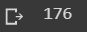



# Manipulación de datos

## Creación de columnas calculadas
Una de las operaciones más utilizadas en cualquier tabla es la creación de nuevas columnas a partir de las existentes. Este mismo tipo de función es la que se puede usar en el Dataframe. Para ello, sólo es necesario crear una nueva columna con una asignación idéntica a la que se haría en un diccionario por lo que el cálculo interno es transparente para el usuario.

Para la eliminación de una columna se utiliza el método ***drop***, indicando una columna o una lista de columnas. Recordad que se debe usar el axis=1 para tratar con columnas, en caso contrario serviría para la eliminación de filas (index).

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1hFFsQelWwklTOUwy240bnNVfaXpC_idw)

In [ ]:
datosCSV.drop(index=[0,1,3,4])

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,cases100k
2,02/07/2020,2,7,2020,319,28,Afghanistan,AF,AFG,38041757.0,Asia,0.838552
5,29/06/2020,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia,0.922670
6,28/06/2020,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia,0.433734
7,27/06/2020,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia,0.725519
8,26/06/2020,26,6,2020,460,36,Afghanistan,AF,AFG,38041757.0,Asia,1.209198
...,...,...,...,...,...,...,...,...,...,...,...,...
27617,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.000000
27618,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.000000
27619,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.000000
27620,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.006828


## Tratamiento de valores vacíos o nulos
Es muy normal disponer de tablas con elementos sin valor o valores nulos. Para ello existe el método ***isnull*** o ***isna** (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) que permite determinar si el valor no fue rellenado. Eso crea un Dataframe con una máscara verdadero/falso si se cumple la condición. Esta máscara permite ser aplicada por filas obteniendo así una tabla filtrada usando el método ***any*** y seleccionando mediante columnas (eje 1).

Nota: Los valores nulos pueden sustituirse por cualquier otro empleando el método ***fillna***.


In [ ]:
# Visualización de un máscara de valores nulo (NaN)
datosCSV.isnull()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,cases100k
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
27617,False,False,False,False,False,False,False,False,False,False,False,False
27618,False,False,False,False,False,False,False,False,False,False,False,False
27619,False,False,False,False,False,False,False,False,False,False,False,False
27620,False,False,False,False,False,False,False,False,False,False,False,False


Resultado esperado:

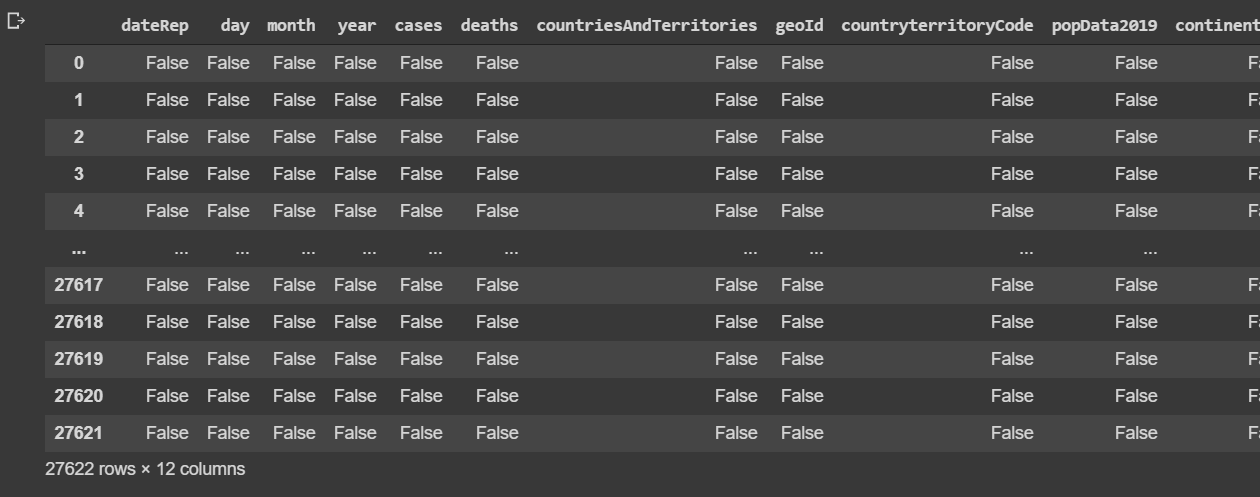

In [67]:
# Visualizar las filas que contienen valores nulos
datosCSV = datosCSV[datosCSV.isna().any(1)]


,countriesAndTerritories,cases,date,casesES
0,Afghanistan,302,4/7/2020,NaN
1,Afghanistan,186,3/7/2020,NaN
2,Afghanistan,319,2/7/2020,NaN
3,Afghanistan,279,1/7/2020,NaN
4,Afghanistan,271,30/6/2020,NaN
...,...,...,...,...
27617,Zimbabwe,0,25/3/2020,NaN
27618,Zimbabwe,0,24/3/2020,NaN
27619,Zimbabwe,0,23/3/2020,NaN
27620,Zimbabwe,1,22/3/2020,NaN


Resultado esperado:

![Resultado](https://drive.google.com/uc?id=19rzaigJ56hHbmvYDeCfpaWDbs85ih-Pk)

## Map en Pandas
Panda soporta el mapeado de los elementos de las columnas usando el método ***apply*** (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) a través de funciones *lambda*. El médodo apply utiliza diversos parámetros, el mínimo es la función a aplicar y el segundo es el ***axis*** que representa la aplicación a índices (0 o filas) y axis (1 o columnas).

In [ ]:
# Importación de la librería de tiempo
import datetime as dt

In [ ]:
# Crear una nueva columna fecha con la aplicación de la fecha usando la librería datetime y otra denominada
# fecha2 usando la librería Pandas. Visualizar la tabla para el país, dateRap, fecha y fecha2
datosCSV['fecha'] = datosCSV.apply(lambda fila: dt.date(fila['year'], fila['month'], fila['day']), axis = 1)
datosCSV['fecha2'] = datosCSV.apply(lambda fila: pd.Timestamp(fila['year'], fila['month'], fila['day']), axis = 1)
datosCSV[['countriesAndTerritories', 'dateRep', 'fecha', 'fecha2']]

,countriesAndTerritories,dateRep,fecha,fecha2
0,Afghanistan,04/07/2020,2020-07-04,2020-07-04
1,Afghanistan,03/07/2020,2020-07-03,2020-07-03
2,Afghanistan,02/07/2020,2020-07-02,2020-07-02
3,Afghanistan,01/07/2020,2020-07-01,2020-07-01
4,Afghanistan,30/06/2020,2020-06-30,2020-06-30
...,...,...,...,...
27617,Zimbabwe,25/03/2020,2020-03-25,2020-03-25
27618,Zimbabwe,24/03/2020,2020-03-24,2020-03-24
27619,Zimbabwe,23/03/2020,2020-03-23,2020-03-23
27620,Zimbabwe,22/03/2020,2020-03-22,2020-03-22


Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1WmxSDcuJV1NYKW6lzGTec6p8wlreoNCA)

## Métodos de agrupamiento
Otra función normal sobre tablas (o sobre Dataframes en nuestro caso) consiste en el cálculo de valores agrupados por algún tipo de atributo de una columna. Para ello se utiliza el método ***groupby*** (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). El método de agrupación soporta una lista de nombres de columnas/filas y otros parámetros como obtención de los resultados ordenados. El resultado de este método es un objeto especial denominado DataFrameGroupBy que crea grupos de filas/columnas usando el criterio dado). El objeto posee como atributos los nombres de los campos agrupados por el criterio empleado y estos grupos se pueden listar usando el atributo ***groups*** que es un diccionario con la lista de entradas.

In [ ]:
# Agrupar los datos por paises y mostrar el diccionario de grupos con los índices.
agrupados = datosCSV.groupby(by='countriesAndTerritories')
agrupados.groups

{'Afghanistan': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             167, 168, 169, 170, 171, 172, 173, 174, 175, 176],
            dtype='int64', length=177),
 'Albania': Int64Index([177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
             ...
             285, 286, 287, 288, 289, 290, 291, 292, 293, 294],
            dtype='int64', length=118),
 'Algeria': Int64Index([295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
             ...
             467, 468, 469, 470, 471, 472, 473, 474, 475, 476],
            dtype='int64', length=182),
 'Andorra': Int64Index([477, 478, 479, 480, 481, 482, 483, 484, 485, 486,
             ...
             580, 581, 582, 583, 584, 585, 586, 587, 588, 589],
            dtype='int64', length=113),
 'Angola': Int64Index([590, 591, 592, 593, 594, 595, 596, 597, 598, 599,
             ...
             685, 686, 687, 688, 689, 690, 691, 692, 693, 694],
            dtype='int64', length=105),
 'Anguilla': Int64Inde

Resultado esperado (parcial):

![Resultado](https://drive.google.com/uc?id=1XKYSMAayNd7IL8BuE3-qsFCZhWa18C-P)

In [ ]:
# Listar los nombres de los países por los que se ha realizado la agrupación anterior.
agrupados.groups.keys()

dict_keys(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina', 'Botswana', 'Brazil', 'British_Virgin_Islands', 'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde', 'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands', 'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt', 'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Falkland_Islands_(Malvinas)', 'Faroe_Islands', 'Fiji', 'Fi

Resultado:

![Resultado](https://drive.google.com/uc?id=1lbG4i3WKzDnKJcNrBALrMjtXiRcx4-cd)

Las agrupaciones permiten cálculos estadísticos a través de los métodos  generales como ***count***, ***sum***, ***std***, ***mean***, ***median***, etc.  También se pueden extraer los cálculos generales a través del método ***describe***.

In [ ]:
# Calcular la suma de casos agrupados por paises y ordenadarlos de mayor a menor
agrupados['cases'].sum().sort_values(ascending=False)

countriesAndTerritories
United_States_of_America             2794321
Brazil                               1539081
Russia                                667883
India                                 648315
Peru                                  295599
                                      ...   
Papua_New_Guinea                          11
Montserrat                                11
British_Virgin_Islands                     8
Bonaire, Saint Eustatius and Saba          7
Anguilla                                   3
Name: cases, Length: 210, dtype: int64

Resultado esperado:
![Resultado](https://drive.google.com/uc?id=1Oqgjgv6EKl8HVGC9Wze_TYydOS4PV-QW)

In [ ]:
# Mostrar las estadísticas básicas (número, media, desviación, etc.) por país.
agrupados['cases'].describe()

,count,mean,std,min,25%,50%,75%,max
countriesAndTerritories,,,,,,,,
Afghanistan,177.0,182.621469,260.880651,0.0,0.00,33.0,285.00,1063.0
Albania,118.0,23.322034,21.361312,0.0,9.00,16.0,27.75,90.0
Algeria,182.0,82.802198,88.946780,0.0,0.00,71.0,139.75,413.0
Andorra,113.0,7.566372,13.017074,0.0,0.00,1.0,9.00,79.0
Angola,105.0,3.123810,5.476691,0.0,0.00,1.0,4.00,32.0
...,...,...,...,...,...,...,...,...
Vietnam,183.0,1.939891,4.259662,0.0,0.00,0.0,1.50,26.0
Western_Sahara,70.0,7.414286,31.732347,0.0,0.00,0.0,0.00,183.0
Yemen,86.0,14.418605,18.711095,0.0,0.25,10.0,19.00,116.0


Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1pQCEl0O8pe4mWb2l4SCf8FNseWZIDp4r)

## Unión de tablas
Otro procedimiento general es poder unir tablas a través del valor de una columna. El mismo procedimiento se aplica en Pandas. Estas uniones se pueden realizar mediante diferentes métodos ***concat***, ***merge***, ***join*** y ***append***.

Uno de los aspectos importantes es que el método ***concat*** realiza una copia de los datos del Dataframe por lo que hay que tener cuidado con la ocupación de memoria.

Para probar las uniones de tablas usaremos los datos de centroides de países que existen en la Carta Digital del Mundo (DCW/World Map) y que pueden ser descargados en https://worldmap.harvard.edu/data/geonode:country_centroids_az8. Usaremos el formato de Excel.


In [ ]:
# Cargar y visualizar los datos de los centroides de la DCW
paises = pd.read_excel(dirDef + 'country_centroids_az8.xls')
paises

,FID,the_geom,FID_,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,geounit,gu_a3,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev,postal,formal_en,formal_fr,note_adm0,note_brk,name_sort,name_alt,mapcolor7,mapcolor8,mapcolor9,mapcolor13,pop_est,gdp_md_est,pop_year,lastcensus,gdp_year,economy,income_grp,wikipedia,fips_10,iso_a2,iso_a3,iso_n3,un_a3,wb_a2,wb_a3,woe_id,adm0_a3_is,adm0_a3_us,adm0_a3_un,adm0_a3_wb,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,Longitude,Latitude
0,country_centroids_az8.1,POINT (-69.9826771125 12.5208803838),0,3,Admin-0 country,5,Netherlands,NL1,1,2,Country,Aruba,ABW,0,Aruba,ABW,0,Aruba,ABW,0,Aruba,Aruba,ABW,Aruba,NaN,Aruba,AW,Aruba,NaN,Neth.,NaN,Aruba,NaN,4,2,2,9,103065,2258.0,-99,2010,-99,6. Developing region,2. High income: nonOECD,-99,NaN,AW,ABW,533,533,AW,ABW,-99,ABW,ABW,-99,-99,North America,Americas,Caribbean,Latin America & Caribbean,5,5,5,4,-99,-69.982677,12.520880
1,country_centroids_az8.2,POINT (66.0047336558 33.8352307278),1,1,Admin-0 country,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,0,Afghanistan,AFG,0,Afghanistan,AFG,0,Afghanistan,Afghanistan,AFG,Afghanistan,NaN,Afg.,AF,Islamic State of Afghanistan,NaN,NaN,NaN,Afghanistan,NaN,5,6,8,7,28400000,22270.0,-99,1979,-99,7. Least developed region,5. Low income,-99,NaN,AF,AFG,4,4,AF,AFG,-99,AFG,AFG,-99,-99,Asia,Asia,Southern Asia,South Asia,11,11,4,-99,1,66.004734,33.835231
2,country_centroids_az8.3,POINT (17.5373676815 -12.2933605438),2,1,Admin-0 country,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,0,Angola,AGO,0,Angola,AGO,0,Angola,Angola,AGO,Angola,NaN,Ang.,AO,People's Republic of Angola,NaN,NaN,NaN,Angola,NaN,3,2,6,1,12799293,110300.0,-99,1970,-99,7. Least developed region,3. Upper middle income,-99,NaN,AO,AGO,24,24,AO,AGO,-99,AGO,AGO,-99,-99,Africa,Africa,Middle Africa,Sub-Saharan Africa,6,6,4,-99,1,17.537368,-12.293361
3,country_centroids_az8.4,POINT (-63.0649892654 18.2239595023),3,1,Admin-0 country,6,United Kingdom,GB1,1,2,Dependency,Anguilla,AIA,0,Anguilla,AIA,0,Anguilla,AIA,0,Anguilla,Anguilla,AIA,Anguilla,NaN,Ang.,AI,NaN,NaN,U.K.,NaN,Anguilla,NaN,6,6,6,3,14436,108.9,-99,-99,-99,6. Developing region,3. Upper middle income,-99,NaN,AI,AIA,660,660,-99,-99,-99,AIA,AIA,-99,-99,North America,Americas,Caribbean,Latin America & Caribbean,8,8,4,-99,-99,-63.064989,18.223960
4,country_centroids_az8.5,POINT (20.0498339611 41.1424498947),4,1,Admin-0 country,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,0,Albania,ALB,0,Albania,ALB,0,Albania,Albania,ALB,Albania,NaN,Alb.,AL,Republic of Albania,NaN,NaN,NaN,Albania,NaN,1,4,1,6,3639453,21810.0,-99,2001,-99,6. Developing region,4. Lower middle income,-99,NaN,AL,ALB,8,8,AL,ALB,-99,ALB,ALB,-99,-99,Europe,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1,20.049834,41.142450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,country_centroids_az8.237,POINT (-172.16485064 -13.7532434638),236,1,Admin-0 country,4,Samoa,WSM,0,2,Sovereign country,Samoa,WSM,0,Samoa,WSM,0,Samoa,WSM,0,Samoa,Samoa,WSM,Samoa,NaN,Samoa,WS,Independent State of Samoa,NaN,NaN,NaN,Samoa,NaN,3,3,4,6,219998,1049.0,-99,2006,-99,7. Least developed region,4. Lower middle income,-99,NaN,WS,WSM,882,882,WS,WSM,-99,WSM,WSM,-99,-99,Oceania,Oceania,Polynesia,East Asia & Pacific,5,5,5,-99,1,-172.164851,-13.753243
237,country_centroids_az8.238,POINT (47.5867618877 15.9092800505),237,1,Admin-0 country,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,0,Yemen,YEM,0,Yemen,YEM,0,Yemen,Yemen,YEM,Yemen,NaN,Yem.,YE,Republic of Yemen,NaN,NaN,NaN,"Yemen, Rep.",NaN,5,3,3,11,23822783,55280.0,-99,2004,-99,7. Least developed region,4. Lower middle income,-99,NaN,YE,YEM,887,887,RY,YEM,-99,YEM,YEM,-99,-99,Asia,Asia,West

In [ ]:
# Unir la tabla de datos del COVID con los datos de la DCW usando
# como enlaces los códigos de los países de 3 caracteres y manteniendo 
# todas las filas de los datos del COVID. Mostrar los resultados por fecha, país,
# casos, longitud, latitud y codigo de tres caracteres.
datosCSVP = pd.merge(datosCSV, paises, how='left', left_on='countryterritoryCode', right_on='iso_a3')
datosCSVP[['fecha', 'countriesAndTerritories', 'cases', 'Longitude', 'Latitude', 'iso_a3']]

,fecha,countriesAndTerritories,cases,Longitude,Latitude,iso_a3
0,2020-07-04,Afghanistan,302,66.004734,33.835231,AFG
1,2020-07-03,Afghanistan,186,66.004734,33.835231,AFG
2,2020-07-02,Afghanistan,319,66.004734,33.835231,AFG
3,2020-07-01,Afghanistan,279,66.004734,33.835231,AFG
4,2020-06-30,Afghanistan,271,66.004734,33.835231,AFG
...,...,...,...,...,...,...
27617,2020-03-25,Zimbabwe,0,29.851441,-19.004204,ZWE
27618,2020-03-24,Zimbabwe,0,29.851441,-19.004204,ZWE
27619,2020-03-23,Zimbabwe,0,29.851441,-19.004204,ZWE
27620,2020-03-22,Zimbabwe,1,29.851441,-19.004204,ZWE


Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1EqLFROkXt_uZfnshfHg_piAmR2YVAuP6)

In [ ]:
# Comprobar las filas que no han podido ser unidas y visualizarlas
datosCSVP[datosCSVP['Longitude'].isna()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,cases100k,fecha,fecha2,FID,the_geom,FID_,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,geounit,gu_a3,su_dif,subunit,su_a3,brk_diff,name,name_long,brk_a3,brk_name,brk_group,abbrev,...,formal_fr,note_adm0,note_brk,name_sort,name_alt,mapcolor7,mapcolor8,mapcolor9,mapcolor13,pop_est,gdp_md_est,pop_year,lastcensus,gdp_year,economy,income_grp,wikipedia,fips_10,iso_a2,iso_a3,iso_n3,un_a3,wb_a2,wb_a3,woe_id,adm0_a3_is,adm0_a3_us,adm0_a3_un,adm0_a3_wb,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,Longitude,Latitude
3287,04/07/2020,4,7,2020,0,0,"Bonaire, Saint Eustatius and Saba",BQ,BES,25983.0,America,0.0,2020-07-04,2020-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3288,03/07/2020,3,7,2020,0,0,"Bonaire, Saint Eustatius and Saba",BQ,BES,25983.0,America,0.0,2020-07-03,2020-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3289,02/07/2020,2,7,2020,0,0,"Bonaire, Saint Eustatius and Saba",BQ,BES,25983.0,America,0.0,2020-07-02,2020-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3290,01/07/2020,1,7,2020,0,0,"Bonaire, Saint Eustatius and Saba",BQ,BES,25983.0,America,0.0,2020-07-01,2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3291,30/06/2020,30,6,2020,0,0,"Bonaire, Saint Eustatius and Saba",BQ,BES,25983.0,America,0.0,2020-06-30,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24835,04/01/2020,4,1,2020,0,0,Taiwan,TW,CNG1925,23773881.0,Asia,0.0,2020-01-04,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24836,03/01/2020,3,1,2020,0,0,Taiwan,TW,CNG1925,23773881.0,Asia,0.0,2020-01-03,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24837,02/01/2020,2,1,2020,0,0,Taiwan,TW,CNG1925,23773881.0,Asia,0.0,2020-01-02,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1vfk9EHtTraBzCbBn4aVfhcyglyzKA22Q)

## Representación
La representación de un Dataframe viene asociado a la librería Matplotlib. Aunque se tratará en la siguiente sesión, aquí haremos un ejemplo.

Otros ejemplos básicos pueden verse en https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html.

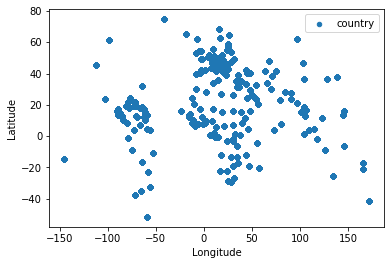

In [ ]:
# Representar los centroides de los paises usando como etiqueta en la leyenda 'country'
datosCSVP.plot(kind='scatter', x='Longitude', y='Latitude', label='country')

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=153FMLAMCUuyRb591g7mlvzLrHY6dDmO7)

## Multiindices
Los multiindices sirven para realizar selecciones, operaciones y manipulaciones más eficientes y rápidas. El ejemplo más típico es el de asignar indices por localizaciones administrativas que tienen un nivel jerárquicos.

Existen ejemplos más detallados en: https://www.datacamp.com/community/tutorials/pandas-multi-index

**Nota** sobre los multiíndices: Los multiíndices no pueden ser almacenados en los archivos convencionales de exportación, por ello se deben almacenar dentro de la versión pickle.

In [ ]:
# Crear un multindice que agrupe los paises por continentes en un nuevo Dataframe
datosCSVPM = datosCSVP.set_index(['continentExp', 'countriesAndTerritories'], inplace=False)
datosCSVPM

dateRep  day  ...  Longitude   Latitude
continentExp countriesAndTerritories                   ...                      
Asia         Afghanistan              04/07/2020    4  ...  66.004734  33.835231
             Afghanistan              03/07/2020    3  ...  66.004734  33.835231
             Afghanistan              02/07/2020    2  ...  66.004734  33.835231
             Afghanistan              01/07/2020    1  ...  66.004734  33.835231
             Afghanistan              30/06/2020   30  ...  66.004734  33.835231
...                                          ...  ...  ...        ...        ...
Africa       Zimbabwe                 25/03/2020   25  ...  29.851441 -19.004204
             Zimbabwe                 24/03/2020   24  ...  29.851441 -19.004204
             Zimbabwe                 23/03/2020   23  ...  29.851441 -19.004204
             Zimbabwe                 22/03/2020   22  ...  29.851441 -19.004204
             Zimbabwe                 21/03/2020   21  ...  29.851441 -19.004204

[27622 rows x 80 columns]

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1Va6_VLRTrXfRwFU2JaLUE73tmWIRjCIm)

In [ ]:
# Obtener el número de casos por continente ordenados de mayor a menor
casosContinente = datosCSVPM[['cases']].groupby(level=[0]).sum().sort_values(by='cases', ascending=False)
casosContinente

,cases
continentExp,
America,5704771
Europe,2458791
Asia,2430414
Africa,448950
Oceania,9866
Other,696


Resultado esperado:

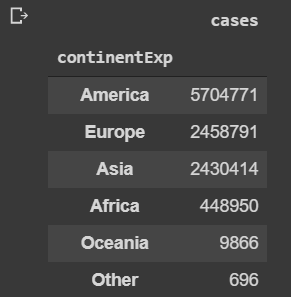

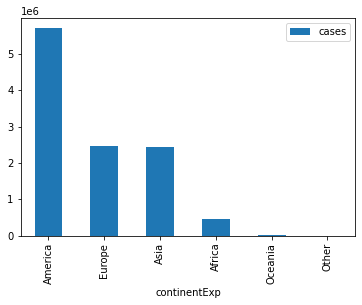

In [ ]:
# Obtener un gráfico de barras con el resultado anterior
casosContinente.plot(kind='bar')

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1kVMwtiNtalL8NeIhfKW7WNBfJO28FCG_)

## Ventanas móviles
Una función de mucha utilidad consiste en la obtención de valores sobre ventanas móviles, ya que permite suavizar los valores obtenidos generalmente a lo largo del tiempo. Este funcionamiento viene definido a través del método ***rolling*** (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) que genera un objeto sobre el que pueden realizarse operaciones como en los Dataframes (por ejemplo ***sum***, ***mean***, etc.) aplicados a los datos dentro de la ventana.

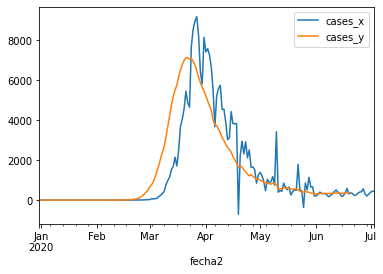

In [ ]:
# Representar los casos en España por día y usando la media de 5 días alrededor
datosFecha = datosCSVP[datosCSVP['countriesAndTerritories'] == 'Spain'][['fecha2','cases','countriesAndTerritories']].set_index('fecha2')
datosMediaMovil =datosFecha.rolling(15).mean()
datosFinales = pd.merge(datosFecha, datosMediaMovil, how='inner', on='fecha2')
datosFinales.plot(kind='line')

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1ihO_CtufZhtOSt4XZ-3V-UHY8FEcLz9G)

![Enlace](https://drive.google.com/uc?export=view&id=1SG6x3Jj5aX1gsOR8XESFcA_NN0KrddsR)
# Ejercicios

## Ejercicio 1
Representar los valores diarios y acumulados de casos COVID-19 en España y Francia tanto de forma diaria como con una media de los 3 días anteriores y posteriores.

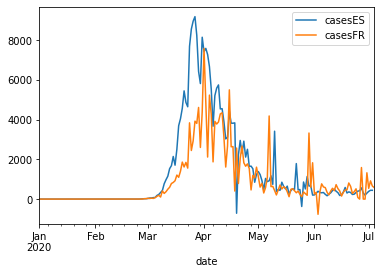

In [189]:
import pandas as pd

datosCSV = pd.read_csv('COVID-19_opendata_ecdc_europa_20200704.csv')

datosCSV['date'] = datosCSV.apply(lambda fila: pd.Timestamp(fila['year'], fila['month'], fila['day']), axis = 1)


cars = {'casesES': datosCSV[(datosCSV.countriesAndTerritories == 'Spain') & (datosCSV.month< 8)].groupby(['date'], sort=True).sum().cases,
        'casesFR': datosCSV[(datosCSV.countriesAndTerritories == 'France') & (datosCSV.month< 8)].groupby(['date'], sort=True).sum().cases,
        }

df = pd.DataFrame(cars, columns = ['casesES', 'casesFR'])

df.plot()




In [ ]:
# Crear una columna nueva que represente los casos cada 100000 habitantes y visualizar junto al país
# Mostrar los datos ordenados por el nuevo valor de forma ascendente
datosCSV['cases100k'] = datosCSV['cases'] / datosCSV['popData2019'] * 100000
datosCSV[['countriesAndTerritories', 'cases100k']].sort_values(by='cases100k')

,countriesAndTerritories,cases100k
26150,United_Kingdom,-44.602083
21778,San_Marino,-26.122544
7575,Ecuador,-14.165124
7573,Ecuador,-8.518644
15313,Lithuania,-3.757805
...,...,...
4963,Cases_on_an_international_conveyance_Japan,NaN
4964,Cases_on_an_international_conveyance_Japan,NaN
4965,Cases_on_an_international_conveyance_Japan,NaN
4966,Cases_on_an_international_conveyance_Japan,NaN


Resultado esperado:

![Resultado ejercicio 1](https://drive.google.com/uc?id=1hRxL5t3rOaZZpBKxtNGNPtp3EuTEac8b)

## Ejercicio 2
Elaborar una gráfica lineal que represente la evolución de los casos de COVID en el mundo por fecha y continente.

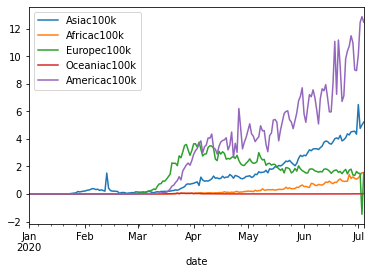

In [223]:
import pandas as pd

datosCSV = pd.read_csv('COVID-19_opendata_ecdc_europa_20200704.csv')

datosCSV['date'] = datosCSV.apply(lambda fila: pd.Timestamp(fila['year'], fila['month'], fila['day']), axis = 1)
datosCSV['cases100k'] = datosCSV['cases'] /  10000

cars = {'Asiac100k': datosCSV[(datosCSV.continentExp == 'Asia') & (datosCSV.month< 8)].groupby(['date'], sort=True).sum().cases100k,
        'Africac100k': datosCSV[(datosCSV.continentExp == 'Africa') & (datosCSV.month< 8)].groupby(['date'], sort=True).sum().cases100k,
        'Europec100k': datosCSV[(datosCSV.continentExp == 'Europe') & (datosCSV.month< 8)].groupby(['date'], sort=True).sum().cases100k,
        'Oceaniac100k': datosCSV[(datosCSV.continentExp == 'Oceania') & (datosCSV.month< 8)].groupby(['date'], sort=True).sum().cases100k,
        'Americac100k': datosCSV[(datosCSV.continentExp == 'America') & (datosCSV.month< 8)].groupby(['date'], sort=True).sum().cases100k
        }

df = pd.DataFrame(cars, columns = ['Asiac100k', 'Africac100k', 'Europec100k', 'Oceaniac100k', 'Americac100k'])

df.plot()

Resultado esperado:

![Resultado](https://drive.google.com/uc?id=1KHE6wZ-nwZUXC0BZpea3BA6akqQKKxr5)